In [1]:
# 데이터분석
import pandas as pd
import numpy as np 

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

import os
import warnings
import random

# ML/DL 모델 및 sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import FinanceDataReader as fdr

# 경고 끄기
warnings.filterwarnings(action='ignore')

# 데이터프레임 제한 풀기
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_seq_items', None)

from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf


### 전처리

In [2]:
# 월 평균값을 내셨다면 안해도 되는 코드들입니다.
# 데이터프레임에 월별주가평균, 코스피월별평균만 있으면 됩니다.
# 월 평균 값만 남기고 나머지 빈칸 있는 행 삭제
# df = pd.read_csv('data/9_emart주가_월평균.csv')
# df = df.dropna()
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.strftime('%Y-%m')
# df = df.set_index('date')
# df = df.reset_index('date')
'''
# 월 평균값 있을때
df = pd.read_csv('data/10_emart - 주가,코스피원본.csv')
df.date = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df.set_index('date')

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=['pricemm','kospimm'])
df = df.reset_index('date')
df_scaled.insert(0,'date', df['date'] )

df = df.merge(df_scaled,how='left')
df.head()
'''

"\n# 월 평균값 있을때\ndf = pd.read_csv('data/10_emart - 주가,코스피원본.csv')\ndf.date = pd.to_datetime(df.date)\ndf['date'] = df['date'].dt.strftime('%Y-%m')\ndf = df.set_index('date')\n\n# MinMaxScaler로 price, kospi 데이터 정규화\nscaler = MinMaxScaler()\nscaler.fit(df)\nscaled = scaler.transform(df)\ndf_scaled = pd.DataFrame(scaled, columns=['pricemm','kospimm'])\ndf = df.reset_index('date')\ndf_scaled.insert(0,'date', df['date'] )\n\ndf = df.merge(df_scaled,how='left')\ndf.head()\n"

In [2]:
# 월별 날짜로 만들기

def to_month(data):
    data['date'] = data['Date']
    
    for i in range(len(data)):
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['date'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
    data = data.drop(columns=['Date','Open','High','Low','Volume','Change'])
    
    # df column 위치 조절
    data = data[['date','Close']]
    data = data.groupby('date').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.date = data.date.astype(str)
        data.date[j] = data.date[j][:7]

    return data

In [3]:
# 월별 날짜로 만들기

def to_month_kospi(data):
    data['date'] = data['Date']
    
    for i in range(len(data)):
#         data['Date'][i] = datetime.strptime(str(kospi.Date[i]), '%Y-%m-%d')
        year = str(data.Date[i].year)
        month = str(data.Date[i].month)
        date = year + '-' + month
        data['Date'][i] = datetime.strptime(str(date), '%Y-%m').date()
        
    data = data.drop(columns=['Date','High','Low','Volume','Open','Adj Close'])
    
    # df column 위치 조절
    data = data[['date','Close']]
    data = data.groupby('date').mean()
    
    data = data.reset_index()
    
    # month column으로 만들기
    for j in range(len(data)):
        data.date = data.date.astype(str)
        data.date[j] = data.date[j][:7]

    return data

In [4]:
cj = fdr.DataReader(symbol='097950', start='2018-01-01')
cj = cj.reset_index()
cj = to_month(cj)

In [5]:
kospi = pdr.get_data_yahoo("^KS11",'2018-01-01').reset_index()
kospi = to_month_kospi(kospi)

In [6]:
kospi = kospi.groupby('date').mean()

In [7]:
cj = cj.set_index('date')
# kospi = kospi.set_index('date')

In [8]:
df = pd.merge(cj, kospi,on='date',how='outer')
df = df.rename(columns={'Close_x':'cj_close','Close_y':'kospi_close'})
df = df.reset_index()

In [9]:
df

,date,cj_close,kospi_close
0,2018-01,370250.000000,2520.937722
1,2018-02,338250.000000,2439.104451
2,2018-03,327857.142857,2451.570022
3,2018-04,328500.000000,2458.224761
4,2018-05,347200.000000,2461.300500
5,2018-06,360526.315789,2394.507890
6,2018-07,335022.727273,2284.253651
7,2018-08,342159.090909,2283.796820
8,2018-09,331176.470588,2307.325870
9,2018-10,330119.047619,2153.476696


In [10]:
# MinMaxScaler 데이터 정규화

scaler = MinMaxScaler()

df = df.set_index('date')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'date', df['date'] )

df = df_scaled

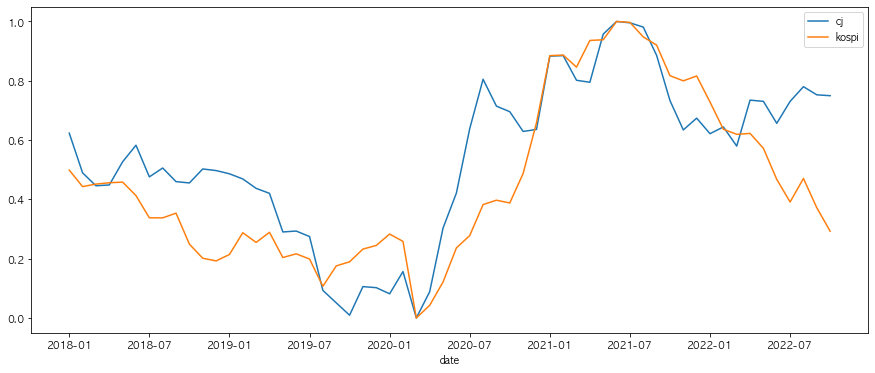

In [11]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.size'] = 23
# plt.rcParams['figure.figsize'] = (13, 8) # figsize 고정
ax=sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax=sns.lineplot(data=df, x="date", y="kospi_close", label='kospi')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')
# plt.xticks(rotation=15)

plt.show()

In [13]:
df = df.reset_index().drop(columns=['index'])#,'level_0'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         58 non-null     object 
 1   cj_close     58 non-null     float64
 2   kospi_close  58 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [12]:
for i in range(len(df)-1):
    df.loc[i+1,'cj_slope'] = df.loc[i+1,'cj_close']-df.loc[i,'cj_close']
    df.loc[i+1,'kospi_slope'] = df.loc[i+1,'kospi_close']-df.loc[i,'kospi_close']

df = df.bfill()

for i in range(len(df)):
    df.loc[i,'diff'] = df.loc[i,'kospi_slope'] - df.loc[i,'cj_slope']

    if df.loc[i,'cj_slope'] < df.loc[i,'kospi_slope']:
        df.loc[i, 'label'] = 1
    else:
        df.loc[i, 'label'] = 0

df

,date,cj_close,kospi_close,cj_slope,kospi_slope,diff,label
0,2018-01,0.623277,0.498638,-0.133878,-0.055578,0.078300,1.0
1,2018-02,0.489398,0.443060,-0.133878,-0.055578,0.078300,1.0
2,2018-03,0.445917,0.451526,-0.043481,0.008466,0.051947,1.0
3,2018-04,0.448607,0.456045,0.002690,0.004520,0.001830,1.0
4,2018-05,0.526842,0.458134,0.078235,0.002089,-0.076146,0.0
5,2018-06,0.582596,0.412771,0.055753,-0.045363,-0.101117,0.0
6,2018-07,0.475896,0.337890,-0.106699,-0.074881,0.031818,1.0
7,2018-08,0.505753,0.337580,0.029856,-0.000310,-0.030167,0.0
8,2018-09,0.459805,0.353560,-0.045948,0.015980,0.061928,1.0
9,2018-10,0.455381,0.249071,-0.004424,-0.104489,-0.100065,0.0


<AxesSubplot:xlabel='label', ylabel='count'>

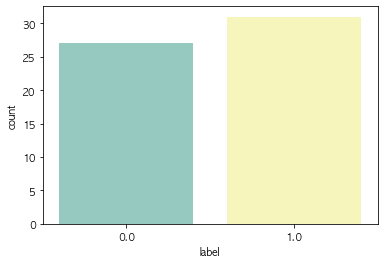

In [16]:
sns.countplot(x=df.label, palette='Set3')

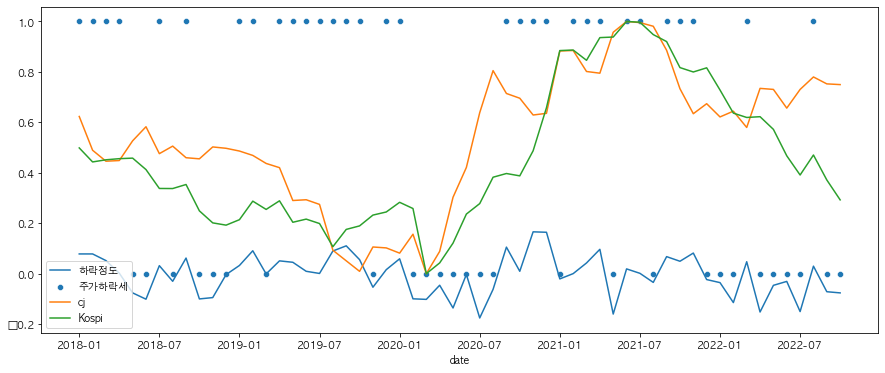

In [13]:
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.lineplot(data=df, x="date", y="diff", label='하락정도')
ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='Kospi')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')
# plt.xticks(rotation=15)


plt.show()

In [18]:
# df.to_csv('yvalue_cj.csv',index=False)

- 저장해서 액셀로 켜시고 https://docs.google.com/spreadsheets/d/1fgvvsrypJKAZEljnHw-BNQsWu9WNRNBAtiMUwEad9Sc/edit#gid=1221057598 이 파일을 복사해서 각 시트에 y값('downturn'열)을 만든 데이터로 대체하시면 됩니다.
- downturn이 target(y값) feature입니다. 이것만 date 열 오른쪽에 남기고, 그 오른쪽에 필요한 feature를 추가하면 됩니다.
- 카테고리별로 시트를 나눠놨으니 그 시트에 바로 복붙하세요

#### feature importance로 feature selection

In [19]:
'''
# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['k_s - p_s'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['downturn'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델 학습
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
print('정확도 : ', accuracy_score(y_pred, y_test))

# feature importance 확인
ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('경제 동행&후행 Feature Importances') # 그래프 제목을 변경해주세요
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()
'''

"\n# 데이터 불러오기 및 날짜 인덱스 지정\ndf_f = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요\ndf_f.date = pd.to_datetime(df_f.date)\ndf_f = df_f.set_index('date')\ndf_f = df_f.drop(['k_s - p_s'], axis=1)\n\nfrom sklearn.tree import DecisionTreeClassifier\n\n# train, test split (8:2)\nX_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['downturn'], test_size=0.2, random_state=0)\ntrain_cnt = y_train.count()\ntest_cnt = y_test.count()\nprint(X_train.shape)\nprint(X_test.shape)\n\n# 0,1이 고르게 나누어졌을까?\nprint(y_train.value_counts()/train_cnt)\nprint(y_test.value_counts()/test_cnt)\n\n# CART 모델 학습\nmodel = DecisionTreeClassifier(max_depth=3, random_state=1)\nmodel.fit(X_train, y_train)\n\n# predict\ny_pred = model.predict(X_test)\nprint('정확도 : ', accuracy_score(y_pred, y_test))\n\n# feature importance 확인\nftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)\n\nftr_top5 = ftr_importances.sort_values(ascending=False)[:20]\n\nplt.figure(figsize=(8,

- 이런 식으로 상위에 뜬 feature만 selection해서 새로운 데이터 프레임을 만듭니다(액셀 작업 추천)
- accuracy가 0.7 이 넘는 데이터에서 나온 feature를 넣는게 좋았던 것 같습니다.

(44, 29)
(12, 29)
1    0.590909
0    0.409091
Name: label, dtype: float64
0    0.583333
1    0.416667
Name: label, dtype: float64
정확도 :  0.3333333333333333


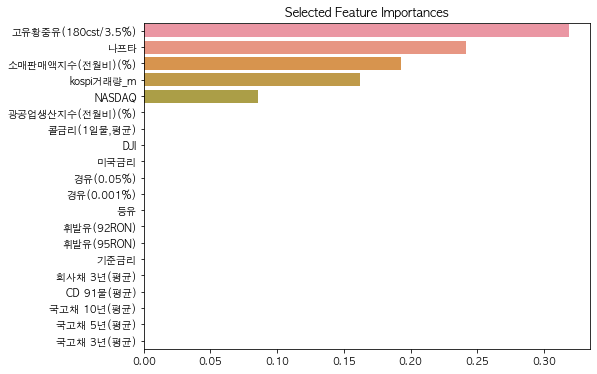

In [17]:

# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_excel('data/CJ_feature_18_22.xlsx') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['diff','동행종합지수(2015=100)', '후행종합지수(2015=100)', 'kospi전일대비월평균'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)
# model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Selected Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()


## xgboost

(44, 29)
(12, 29)
1    0.590909
0    0.409091
Name: label, dtype: float64
0    0.583333
1    0.416667
Name: label, dtype: float64
[11:31:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1662013895516/work/src/learner.cc:627: 
Parameters: { "prams" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


정확도 :  0.4166666666666667


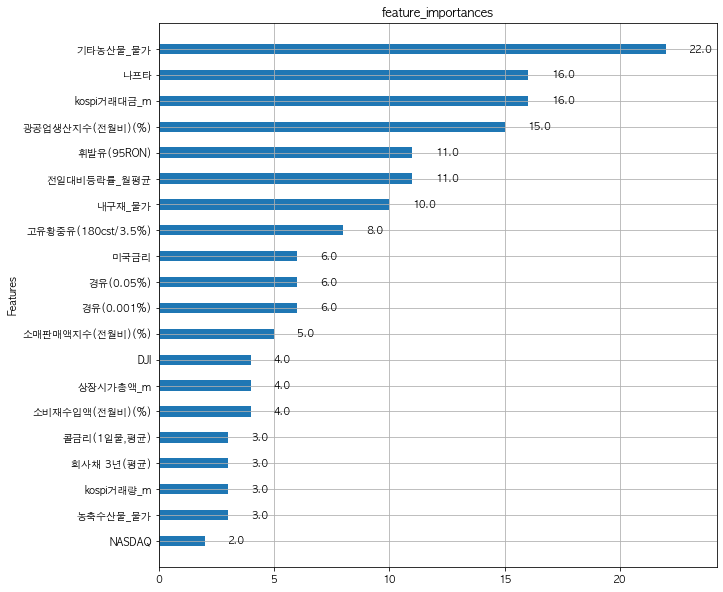

In [20]:
from xgboost import XGBClassifier
import xgboost

# 데이터 불러오기 및 날짜 인덱스 지정
df_f = pd.read_excel('data/CJ_feature_18_22.xlsx') # 파일 경로를 수정해주세요
df_f.date = pd.to_datetime(df_f.date)
df_f = df_f.set_index('date')
df_f = df_f.drop(['diff','동행종합지수(2015=100)', '후행종합지수(2015=100)', 'kospi전일대비월평균'], axis=1)

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df_f.iloc[:,1:], df_f['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# best_params = {'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 0.7, 'learning_rate': 0.3, 
#                'max_depth': 4, 'max_leaves': 10, 'min_child_weight': 5, 'n_estimators': 300, 
#                'random_state': 99, 'reg_alpha': 0.1, 'subsample': 0.7, 'tree_method': 'hist'}

best_params18 = {'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 3, 'learning_rate': 0.3, 
                 'max_depth': 3, 'max_leaves': 10, 'min_child_weight': 1, 
                 'n_estimators': 200, 'random_state': 99, 'reg_alpha': 1, 
                 'subsample': 0.7, 'tree_method': 'hist'}

# model
# model = DecisionTreeClassifier(max_depth=3, random_state=1) # 0.75
# model = XGBClassifier(tree_method= 'hist') # acc = 0.6667
# model = XGBClassifier(n_estimators=1000,random_state = 42) # acc = 0.6667
# model = XGBClassifier(gamma=3, learning_rate=0.6,random_state=99) # acc = 0.9167
model = XGBClassifier(prams=best_params18)
# model = XGBClassifier(gamma=3, learning_rate=0.3, random_state = 99, tree_method= 'hist') # acc = 0.5
# 가끔 도움 되는 파라미터
# model = XGBClassifier(colsample_bytree=1.0, eta=0.3, gamma=3, learning_rate=0.3, max_depth=3, max_leaves=10, min_child_weight= 1, n_estimators= 400, random_state = 99, reg_alpha= 0.01, subsample= 0.7, tree_method= 'hist')
# subsample= 0.7, tree_method= 'hist' 이거 2개 파라미터 도움 안됨
# model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_valid, y_valid)])
model.fit(X_train, y_train)

# prediction
# xgb_roc_score = roc_auc_score(y_valid, model.predict_proba(X_test)[:,1], average='macro')
# print(xgb_roc_score)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.rcParams['font.family'] = 'AppleGothic'
xgboost.plot_importance(model, title='feature_importances', xlabel='', ax=ax, max_num_features=20, height=0.4)
# xgboost.plot_importance(xgb, title='feature_importances', xlabel='', grid=False, ax=ax)
plt.show()

#### 하락 팩터 찾기

In [28]:
## feature selection된 데이터 MinMaxScaling

df_f = df_f.drop(columns=['label'])

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df_f)
scaled = scaler.transform(df_f)
df_scaled = pd.DataFrame(scaled, columns=list(df_f.columns))

# 정규화한 데이터에 날짜 열 추가
df_scaled.insert(0,'date', df['date'] )

# 원본데이터에 merge
df = df.merge(df_scaled, how='left')
df = df.fillna(method='ffill')
df

,date,cj_close,kospi_close,cj_slope,kospi_slope,diff,label,광공업생산지수(전월비)(%),소매판매액지수(전월비)(%),소비재수입액(전월비)(%),소비자물가지수,농축수산물_물가,기타농산물_물가,내구재_물가,kospi거래대금_m,kospi거래량_m,전일대비등락률_월평균,상장시가총액_m,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
0,2018-01,0.623277,0.498638,-0.133878,-0.055578,0.078300,1.0,0.442623,0.633803,0.701299,0.000000,0.071221,0.350901,0.222330,0.123386,0.067183,0.648414,0.403059,0.513208,0.527344,0.577406,0.405512,0.476852,0.567416,0.500
1,2018-02,0.489398,0.443060,-0.133878,-0.055578,0.078300,1.0,0.524590,0.507042,0.740260,0.070434,0.246880,0.460620,0.174515,0.111787,0.088356,0.281133,0.374018,0.547170,0.566406,0.635983,0.444882,0.472222,0.567416,0.500
2,2018-03,0.445917,0.451526,-0.043481,0.008466,0.051947,1.0,0.540984,0.676056,0.519481,0.060655,0.134864,0.361709,0.349029,0.111648,0.074071,0.541049,0.393925,0.543396,0.550781,0.610879,0.448819,0.472222,0.567416,0.500
3,2018-04,0.448607,0.456045,0.002690,0.004520,0.001830,1.0,0.590164,0.563380,0.428571,0.077581,0.149417,0.265186,0.396845,0.153737,0.155170,0.614105,0.403073,0.513208,0.527344,0.589958,0.433071,0.472222,0.556180,0.500
4,2018-05,0.526842,0.458134,0.078235,0.002089,-0.076146,0.0,0.573770,0.464789,0.337662,0.082095,0.086416,0.329200,0.513835,0.209395,0.257661,0.401447,0.407634,0.535849,0.562500,0.631799,0.460630,0.472222,0.573034,0.500
5,2018-06,0.582596,0.412771,0.055753,-0.045363,-0.101117,0.0,0.672131,0.422535,0.662338,0.063288,0.000000,0.260452,0.375243,0.141685,0.155370,0.350776,0.366964,0.509434,0.527344,0.589958,0.440945,0.472222,0.567416,0.500
6,2018-07,0.475896,0.337890,-0.106699,-0.074881,0.031818,1.0,0.540984,0.492958,0.545455,0.045514,0.020888,0.192040,0.193447,0.049403,0.042789,0.466480,0.299915,0.479245,0.488281,0.543933,0.417323,0.472222,0.567416,0.500
7,2018-08,0.505753,0.337580,0.029856,-0.000310,-0.030167,0.0,0.524590,0.535211,0.350649,0.127516,0.337405,0.324466,0.167233,0.036511,0.000000,0.554513,0.300511,0.449057,0.449219,0.506276,0.381890,0.472222,0.573034,0.500
8,2018-09,0.459805,0.353560,-0.045948,0.015980,0.061928,1.0,0.360656,0.422535,0.285714,0.198890,0.552615,0.511772,0.188835,0.074731,0.027105,0.551771,0.314404,0.422642,0.406250,0.447699,0.279528,0.472222,0.595506,0.500
9,2018-10,0.455381,0.249071,-0.004424,-0.104489,-0.100065,0.0,0.442623,0.464789,0.818182,0.181964,0.376654,0.487055,0.207767,0.076189,0.037770,0.000000,0.220955,0.445283,0.417969,0.456067,0.299213,0.486111,0.584270,0.500


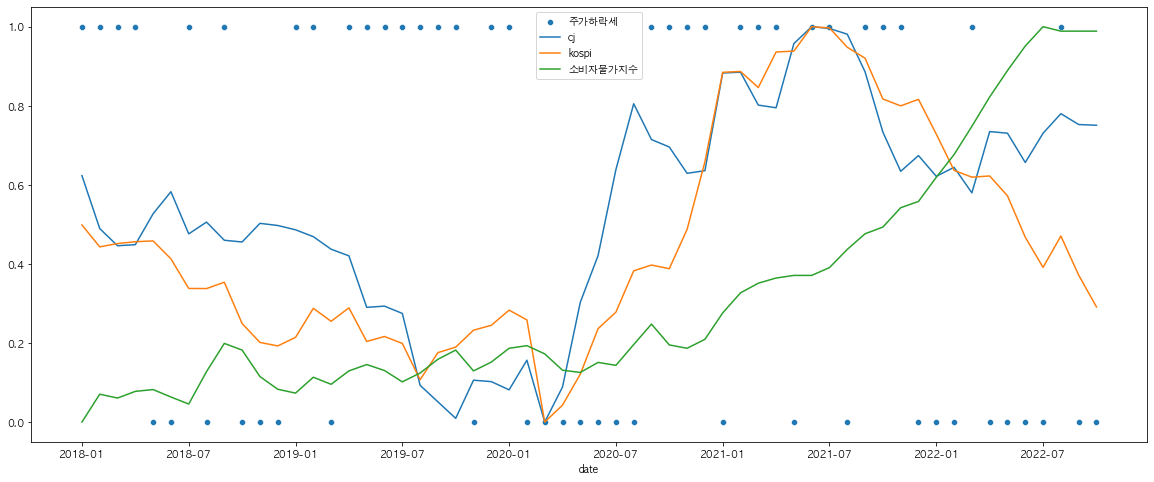

In [43]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi')
ax = sns.lineplot(data=df, x="date", y="소비자물가지수", label='소비자물가지수')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 소비자 물가지수가 일정 지수(약 102) 이하 이면 하락세인 경향을 보인다.
</br>
</br>
- 소비자 물가지수는 꾸준히 높아지고 있지만 주가와 코스피 지수는 상승과 하락을 반복하고 있으므로 큰 연관성을 찾기 어렵다.

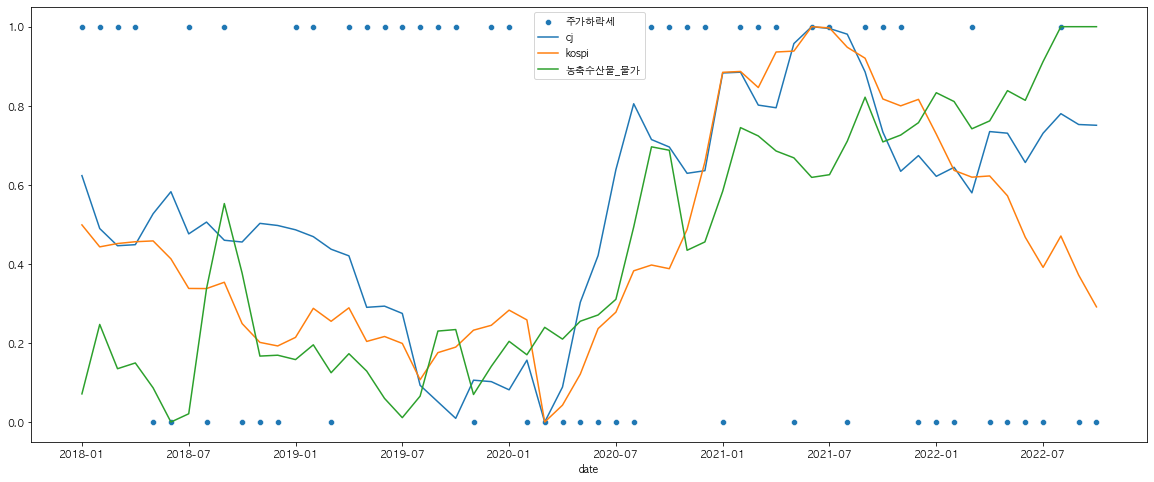

In [44]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi')
ax = sns.lineplot(data=df, x="date", y="농축수산물_물가", label='농축수산물_물가')
# ax = sns.lineplot(data=df, x="date", y="기타농산물_물가", label='기타농산물_물가', color='lightgreen')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 농축수산물 물가 상승시에 하락세인 경향을 보인다. 
</br>
</br>
- 2018-7 ~ 2019-01 구간을 보면 농축산물 물가가 상승과 하락을 반복했지만 코스피와 주가는 계속 하락하고 있고, </br>2020-7 ~ 2022-7 구간에서 초반에는 상승과 하락을 동시에 하면서 연관성이 있어 보이지만 2021-7 구간에 주가 가격과 코스피 수치와 아예 반대되는 것으로 보아 깊은 연관성을 갖고 있다고 보기 어렵다

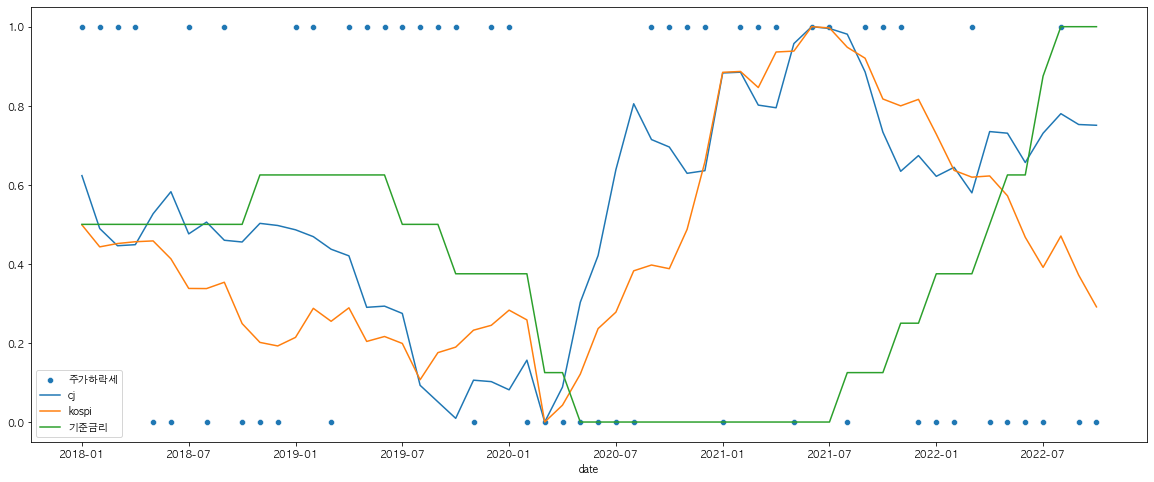

In [36]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi')
ax = sns.lineplot(data=df, x="date", y="기준금리", label='기준금리')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 금리가 하락할 수록 주가와 가격은 올라가고(2019-07 ~ 2021-07), 금리가 상승할 수록 주가와 가격이 낮아지는 것(~ 2019-07, 2021-07 ~)을 볼 수 있다

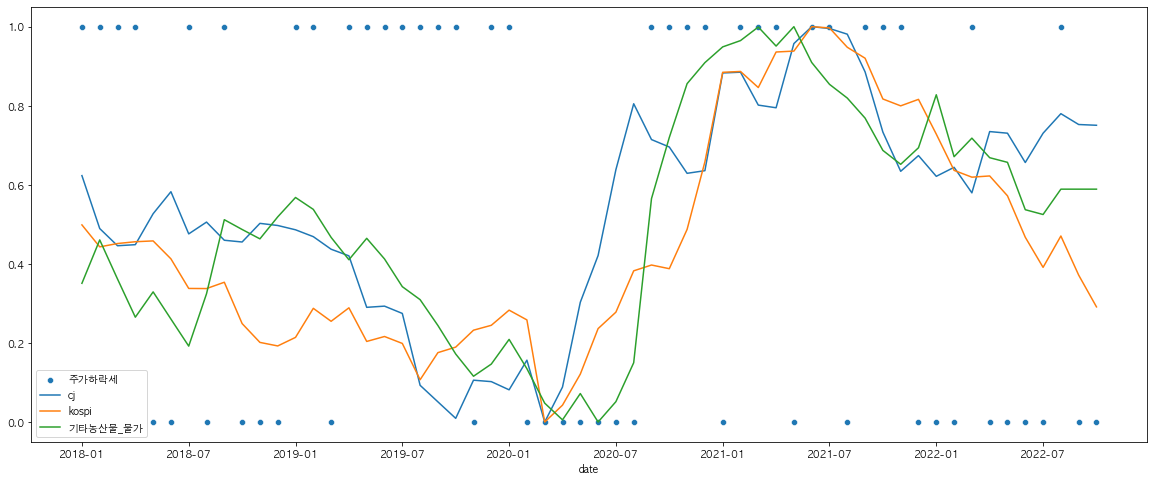

In [59]:
# 주가 데이터 그래프
plt.figure(figsize=(20, 8))
plt.rcParams['font.family'] = 'AppleGothic'

ax = sns.scatterplot(data=df, x="date", y="label", label='주가하락세')
ax = sns.lineplot(data=df, x="date", y="cj_close", label='cj')
ax = sns.lineplot(data=df, x="date", y="kospi_close", label='kospi')
ax = sns.lineplot(data=df, x="date", y="기타농산물_물가", label='기타농산물_물가')

total_len = len(df.index)
ax.set_xticks(np.arange(0, total_len + 1, 6))

plt.ylabel('')

plt.show()

- 2018-01 ~ 2018-07 구간에서는 코스피와 같은 하락세의 움직임을 보이지만 2021-05 구간에는 주가와 코스피보다 미리 하락세로 전환되는 것을 볼 수 있다. 상승하는 구간과 하락하는 구간이 주가, 코스피와 대부분 상관관계가 있어 보이나 절대적인 것은 아니며 2022-01 구간에는 기타 농산물 물가가 상승하지만 주가와 코스피는 하락하는 모습을 보이기도 한다 